In [146]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import pandas as pd
import  itertools

sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [147]:
with open("../code/build/Release/compare_sl_om.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']
df = pd.DataFrame(benchmarks)

df['cpu_time_ms'] = df['cpu_time'] / 1e6
df['RAM'] = df['RAM'].astype(int)
df['n'] = df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)
df['op_ns'] = df['cpu_time'] / df['n']

df.drop(inplace=True, columns=['cpu_time', 'iterations', 'real_time', 'family_index', 'per_family_instance_index', 'repetitions', 'repetition_index', 'threads', 'time_unit', 'Page', 'items_per_second', 'run_type', 'run_name'])

df['name'] = df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df['operation'] = df['name'].apply(lambda x: x.split('_')[1].split('<')[0] if '_' in x else x)
df['name'] = df['name'].apply(lambda x: x.split('_')[0].split('>')[0] if '_' in x else x)

df.rename(columns={
    'cpu_time_ms': 'CPU Time (ms)',
    'RAM': 'Physical Memory Usage (KB)',
    'op_ns': 'Average Running Time (ns/op)',
}, inplace=True)

df

,name,Physical Memory Usage (KB),CPU Time (ms),n,Average Running Time (ns/op),operation
0,SkipList,0,0.000114,8,14.299665,Insertion
1,SkipList,0,0.000176,16,10.986328,Insertion
2,SkipList,0,0.000578,32,18.066406,Insertion
3,SkipList,0,0.001196,64,18.692017,Insertion
4,SkipList,0,0.003247,128,25.367788,Insertion
...,...,...,...,...,...,...
83,OrderedMap,68,273.437500,524288,521.540642,Search
84,OrderedMap,23996,890.625000,1048576,849.366188,Search
85,OrderedMap,49152,2187.500000,2097152,1043.081284,Search
86,OrderedMap,98832,5453.125000,4194304,1300.126314,Search


In [148]:
names = df['name'].unique().tolist()
operations = df['operation'].unique()
exclude_columns = ['name', 'n', 'operation', 'b']
print(names, operations)

['SkipList', 'OrderedMap'] ['Insertion' 'Search']


In [149]:
df_sl = df[df['name'] == 'SkipList']
df_om = df[df['name'] == 'OrderedMap']

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


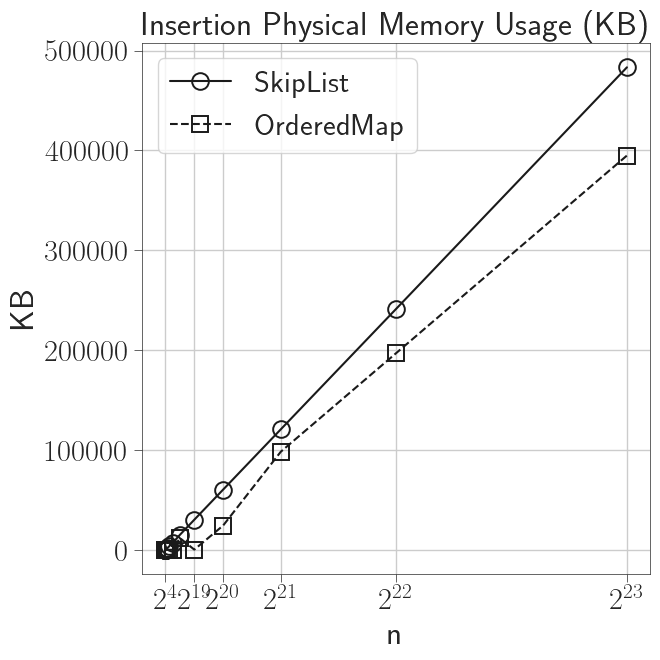

bt CPU Time (ms)
om CPU Time (ms)


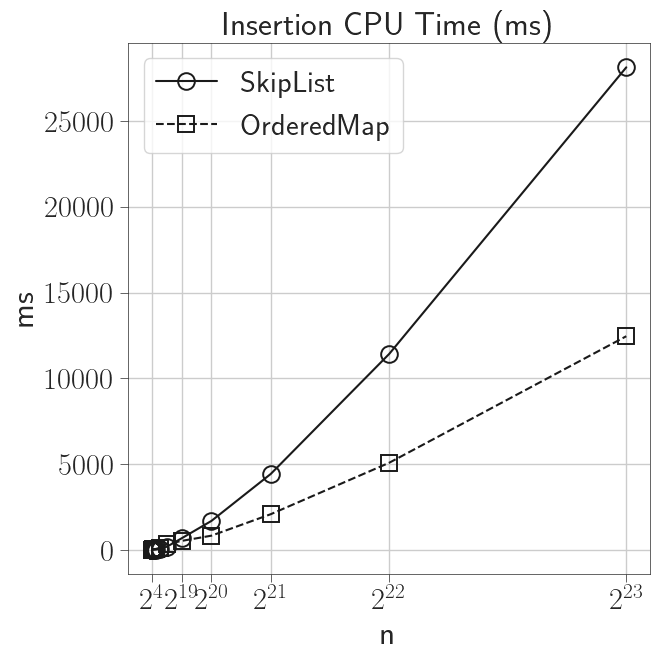

bt Average Running Time (ns/op)
om Average Running Time (ns/op)


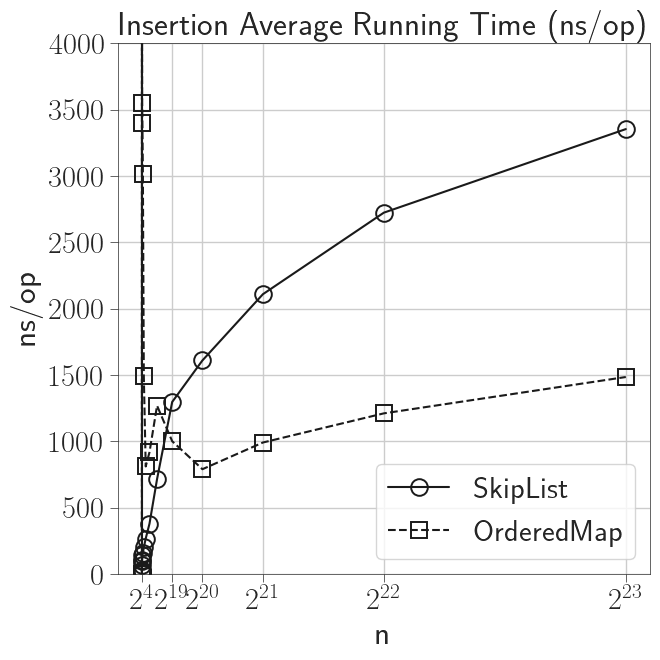

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


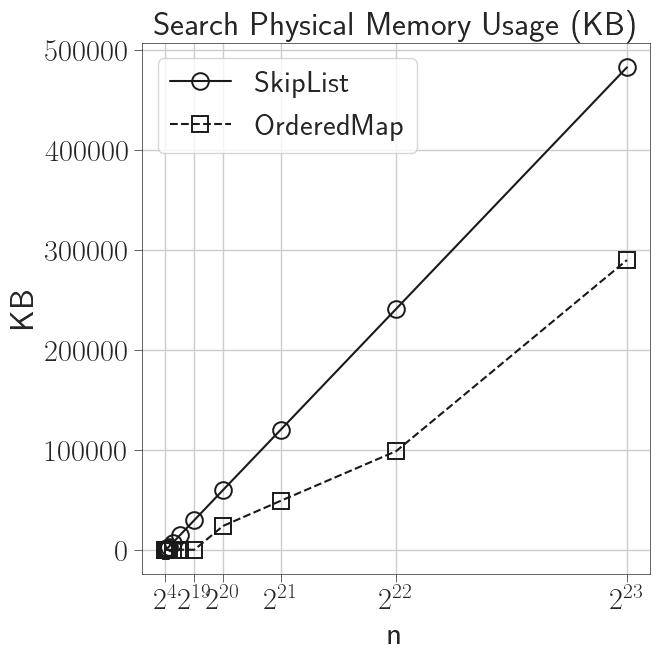

bt CPU Time (ms)
om CPU Time (ms)


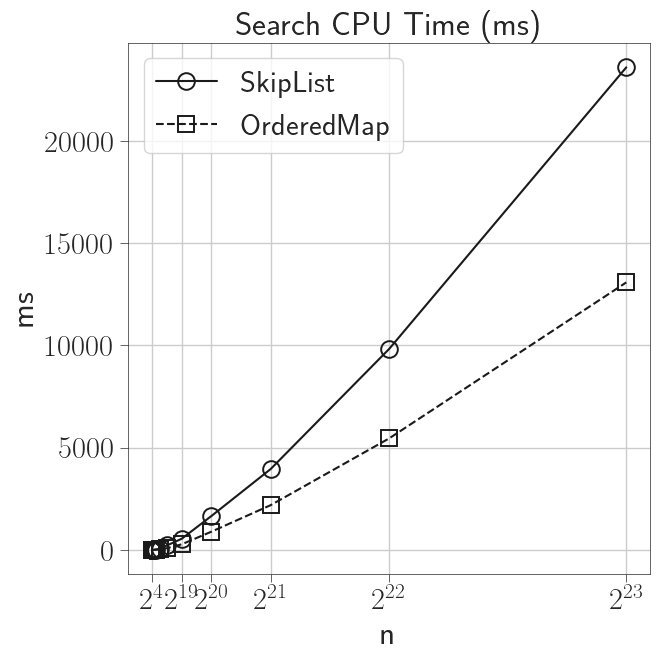

bt Average Running Time (ns/op)
om Average Running Time (ns/op)


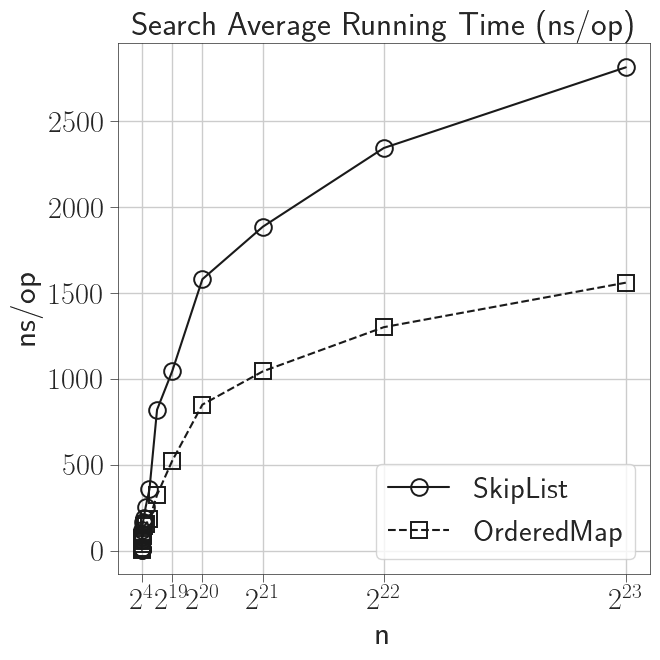

In [150]:

from matplotlib.ticker import FuncFormatter
def log_tick_formatter(val, pos=None):
    return f'$2^{{{int(np.log2(val))}}}$'


markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_sl_ops = df_sl[df_sl['operation'] == op]
    df_om_ops = df_om[df_om['operation'] == op]

    for column in df_sl.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(7,7))

            marker_cyc = itertools.cycle(markers)

            print(f'bt {column}')
            sns.lineplot(
                data=df_sl_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label= f'SkipList',
                ax=ax
            )

            print(f'om {column}')
            sns.lineplot(
                data=df_om_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label='OrderedMap',
                ax=ax
            )

            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('n')

            plt.xticks( [2**4] + list(df_sl['n'].unique())[16:])
            ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            if "op" in column and "Insertion" in op :
                plt.ylim([0, 4000])



            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)




            plt.tight_layout()
            plt.savefig('plot/' 'sl_' +ax.get_title().lower().replace(' ', '_').replace('/', '_') + '.pdf', bbox_inches='tight')
            plt.show()

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


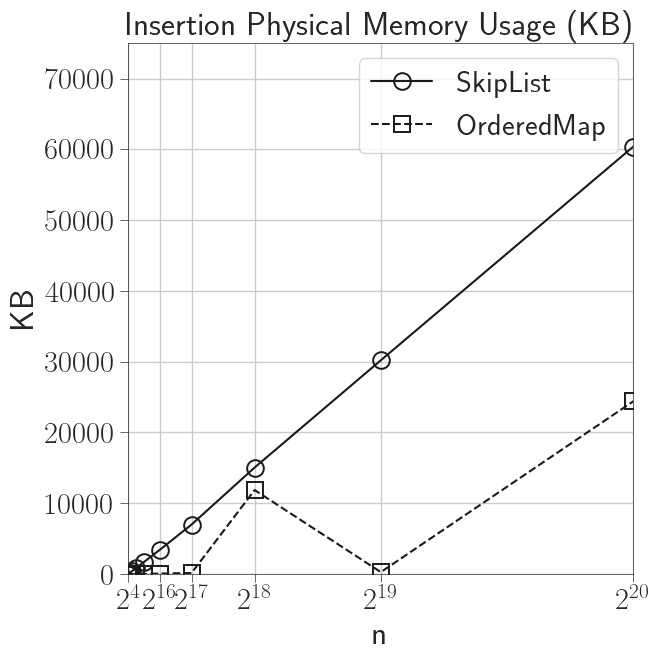

bt CPU Time (ms)
om CPU Time (ms)


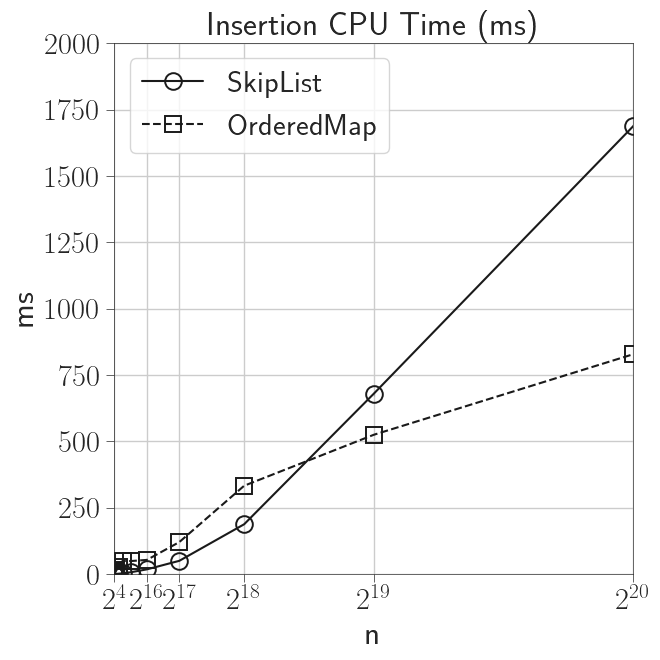

bt Average Running Time (ns/op)
om Average Running Time (ns/op)


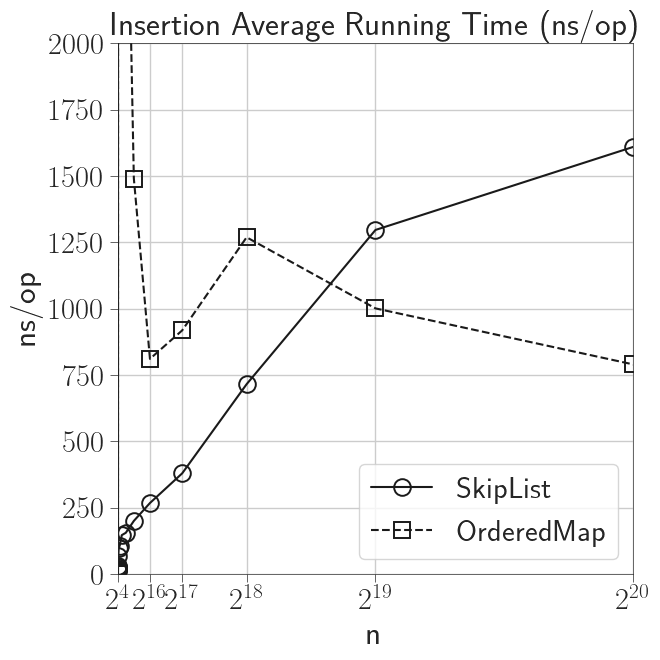

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


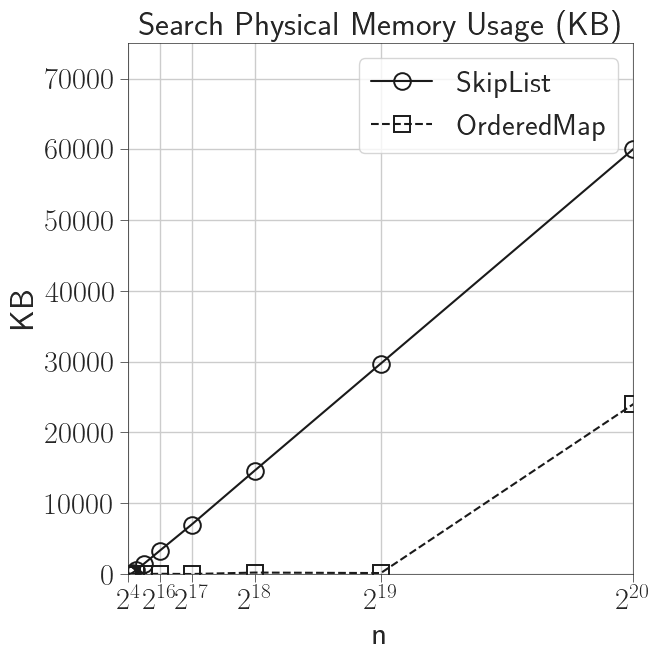

bt CPU Time (ms)
om CPU Time (ms)


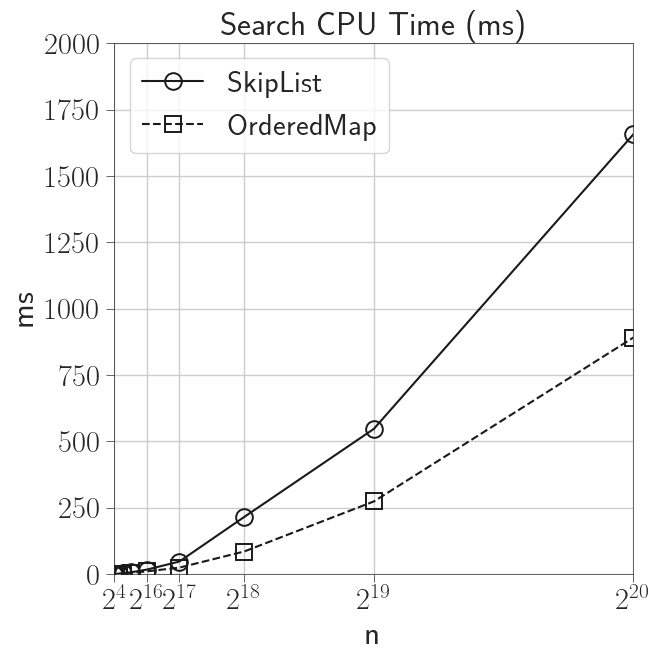

bt Average Running Time (ns/op)
om Average Running Time (ns/op)


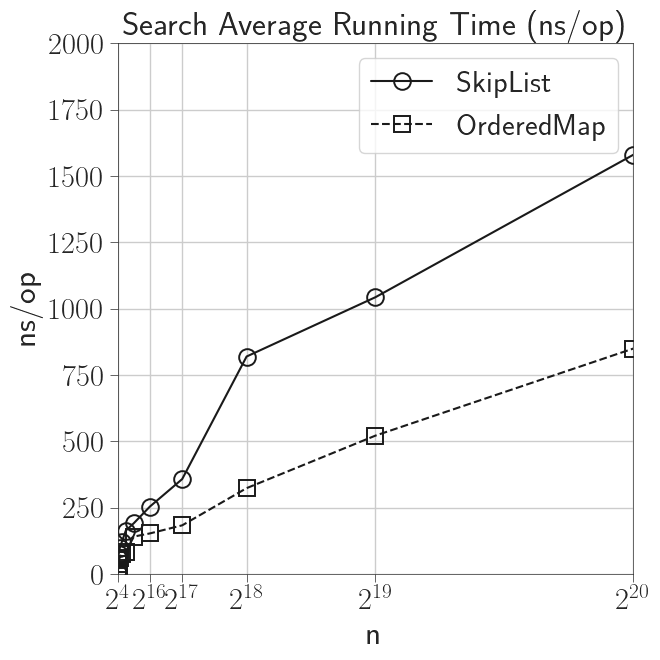

In [151]:
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_sl_ops = df_sl[df_sl['operation'] == op]
    df_om_ops = df_om[df_om['operation'] == op]

    for column in df_sl.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(7,7))

            marker_cyc = itertools.cycle(markers)

            print(f'bt {column}')
            sns.lineplot(
                data=df_sl_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label= f'SkipList',
                ax=ax
            )

            print(f'om {column}')
            sns.lineplot(
                data=df_om_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label='OrderedMap',
                ax=ax
            )

            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('n')

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            plt.xticks( [2**4] + list(df_sl['n'].unique())[13:])
            ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            plt.xlim([0, 2**20])

            if "Memory" in column:
                plt.ylim([0, 7.5E4])
            else:
                plt.ylim([0, 2E3])


            plt.tight_layout()
            plt.savefig('plot/' 'sl_lim' +ax.get_title().lower().replace(' ', '_').replace('/', '_') + '.pdf', bbox_inches='tight')
            plt.show()

In [152]:
with open("../code/build/Release/sl_over_ml.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']
df = pd.DataFrame(benchmarks)

df['cpu_time_ms'] = df['cpu_time'] / 1e6
df['RAM'] = df['RAM'].astype(int)
df['n'] = df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)
df['op_ns'] = df['cpu_time'] / df['n']

df.drop(inplace=True, columns=['cpu_time', 'iterations', 'real_time', 'family_index', 'per_family_instance_index', 'repetitions', 'repetition_index', 'threads', 'time_unit', 'Page', 'items_per_second', 'run_type', 'run_name'])


df['name'] = df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df['operation'] = df['name'].apply(lambda x: x.split('_')[1].split('<')[0] if '_' in x else x)
df['max level'] = pd.to_numeric(df['name'].str.extract(r'<(\d+)>')[0])
df['name'] = df['name'].apply(lambda x: x.split('_')[0].split('>')[0] if '_' in x else x)

df.rename(columns={
    'cpu_time_ms': 'CPU Time (ms)',
    'RAM': 'Physical Memory Usage (KB)',
    'op_ns': 'Average Running Time (ns/op)',
}, inplace=True)

df

,name,Physical Memory Usage (KB),CPU Time (ms),n,Average Running Time (ns/op),operation,max level
0,SkipList,6888,30250.000000,131072,230789.184570,Insertion,2
1,SkipList,7232,2906.250000,131072,22172.927856,Insertion,4
2,SkipList,7424,765.625000,131072,5841.255188,Insertion,6
3,SkipList,7480,296.875000,131072,2264.976501,Insertion,8
4,SkipList,7456,131.696429,131072,1004.764012,Insertion,10
5,SkipList,7424,58.593750,131072,447.034836,Insertion,12
6,SkipList,7416,46.875000,131072,357.627869,Insertion,14
7,SkipList,7404,65.340909,131072,498.511574,Insertion,16
8,SkipList,7440,53.977273,131072,411.813909,Insertion,18
9,SkipList,7484,50.000000,131072,381.469727,Insertion,20


['SkipList'] ['Insertion' 'Search']
bt Physical Memory Usage (KB)


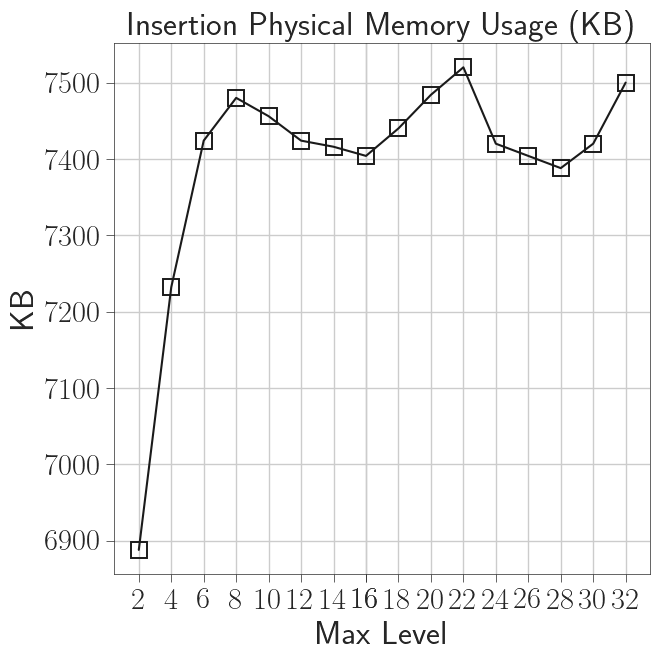

bt CPU Time (ms)


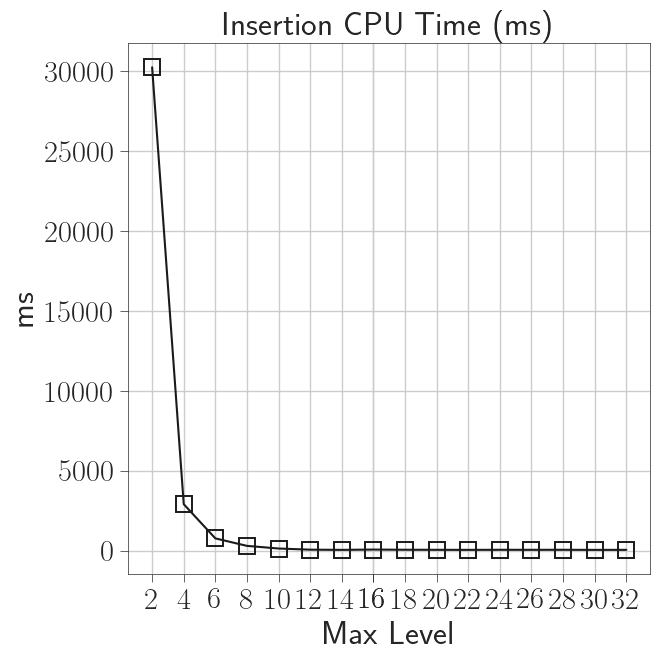

bt Average Running Time (ns/op)


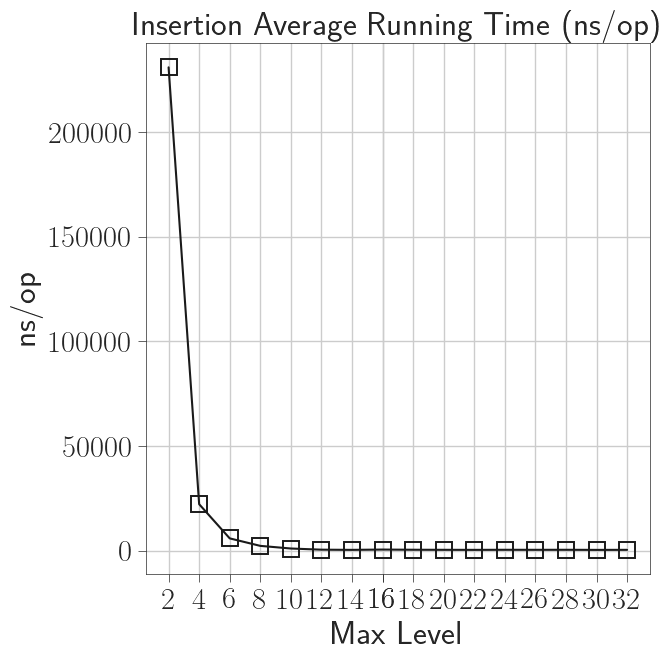

bt Physical Memory Usage (KB)


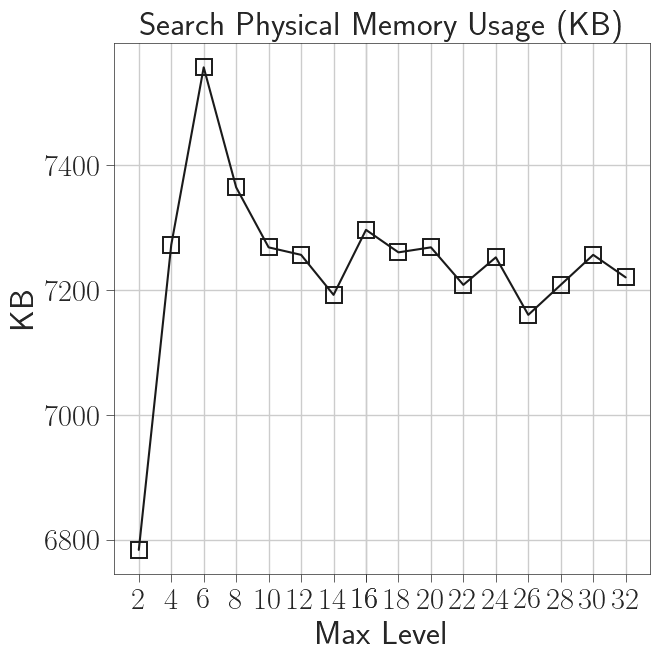

bt CPU Time (ms)


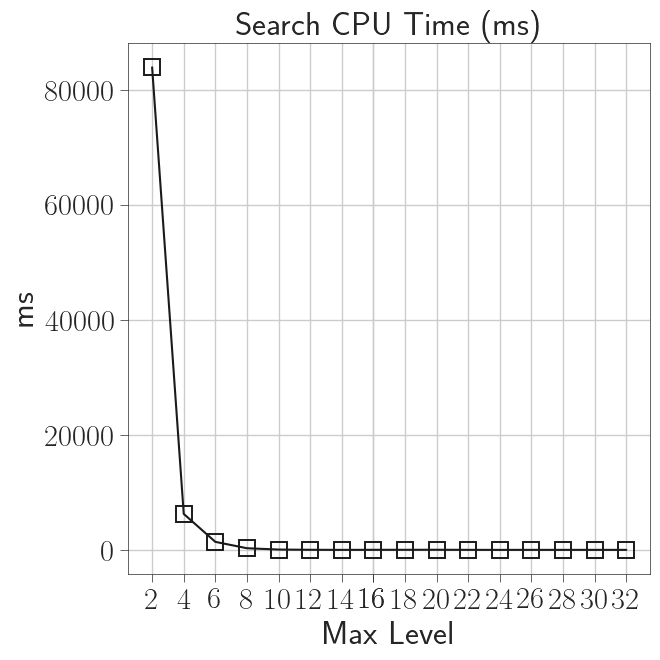

bt Average Running Time (ns/op)


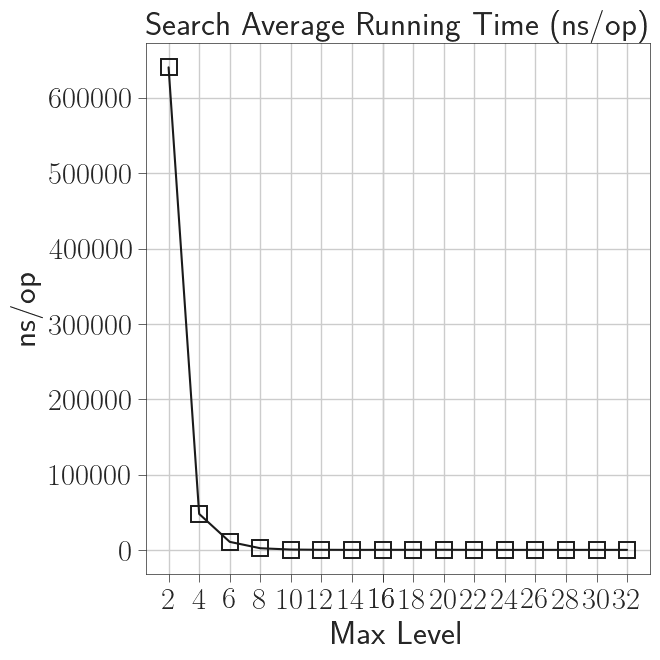

In [153]:
names = df['name'].unique().tolist()
operations = df['operation'].unique()
exclude_columns = ['name', 'n', 'operation', 'b', 'max level']
print(names, operations)
df_sl = df[df['name'] == 'SkipList']

from matplotlib.ticker import FuncFormatter
def log_tick_formatter(val, pos=None):
    return f'$2^{{{int(np.log2(val))}}}$'


markers = ['s', 'o', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_sl_ops = df_sl[df_sl['operation'] == op]
    df_om_ops = df_om[df_om['operation'] == op]

    for column in df_sl.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(7,7))

            marker_cyc = itertools.cycle(markers)

            print(f'bt {column}')
            sns.lineplot(
                data=df_sl_ops,
                x='max level',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                # label= f'SkipList',
                ax=ax
            )


            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('Max Level')

            plt.xticks( [2**4] + list(df_sl['max level'].unique()))
            # ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            ax.grid(True)
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)


            plt.tight_layout()
            plt.savefig('plot/' 'sl_maxlevel_' +ax.get_title().lower().replace(' ', '_').replace('/', '_') + '.pdf', bbox_inches='tight')
            plt.show()